In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

## The Perceptron

$h_w(x) = step(x^Tw)$,


where step funtion is:
- heaviside(z)
- sgn(z)

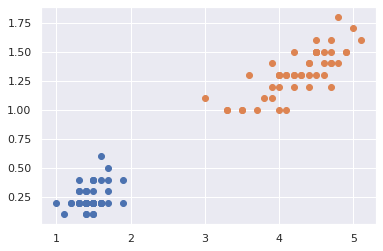

In [27]:
from sklearn.datasets import load_iris

iris_db = load_iris()
X = iris_db.data[:100, 2:]
y = iris_db.target[:100]
plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1])
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1])

In [68]:
class MyPerceptron:

    def __init__(self, n_epochs=150, learning_rate=0.075):
        self.n_epochs = n_epochs
        self.coef_ = None
        self.intercept_ = None

        self.learning_rate = learning_rate

    def fit(self, X, y):
        self.coef_ = np.random.randn(X.shape[1])
        self.intercept_ = np.random.randn(1)
        for epoch in range(self.n_epochs):
            for idx, row in enumerate(X):
                y_pred = self.single_predition(row)
                delta = y[idx] - y_pred
                self.coef_ = self.coef_ + self.learning_rate * delta * row
                self.intercept_ = self.intercept_ + self.learning_rate * delta

    def single_predition(self, Xi):
        return 1 if self.coef_.dot(Xi) + self.intercept_ >=0 else 0


perceptor = MyPerceptron()
perceptor.fit(X, y)
perceptor.coef_, perceptor.intercept_

(array([ 0.35079413, -0.25091451]), array([-0.69555311]))

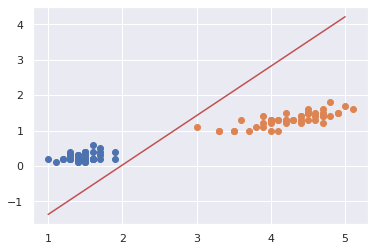

In [70]:
# a = -perceptor.coef_[0]/perceptor.coef_[1]
a = -perceptor.coef_[0]/perceptor.coef_[1]
b = -perceptor.intercept_/perceptor.coef_[1]

t = np.linspace(1, 5)
line = a*t + b

plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1])
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1])
plt.plot(t, line, c='r')